### Import Modules

In [1]:
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import glob
import zika_postprocess as zp
plt.rcParams['xtick.labelsize']=8
plt.rcParams['ytick.labelsize']=8

## Simulation for plane

### Read dphir.txt files from Pygbe

In [2]:
data_sim,data_sim1,data_sim2,data_sim3 = zp.get_data_sym(sym=0), zp.get_data_sym(sym=1), zp.get_data_sym(sym=2), zp.get_data_sym(sym=3)

In [3]:
molar = '40'
sym_active = 'sym1'

data_sim_selected = [data_sim1 if sym_active=='sym1' else data_sim2 if sym_active=='sym2' else data_sim3 if sym_active=='sym3' \
    else data_sim][0]
pqr_file = ['zika_sym1(90_y-axis).pqr' if sym_active == 'sym1' else 'zika_sym2(146_y-axis).pqr' if sym_active == 'sym2'\
    else 'zika_sym3(128_y-axis).pqr'][0]

dist,fqf,_ = zp.compute_force_qf_zika(data_sim_selected[molar], units='pN',fqf_calc=False)
fdb, fib = zp.get_boundary_forces(data_sim_selected, molar)

# Binding force by substracting solvation force for capsid far away from plane
F_terms = fqf+fdb+fib - (fqf[-1]+fdb[-1]+fib[-1] )
f_tot_mag_386 = numpy.sqrt(numpy.sum(F_terms[0]**2)) # Total force magnitude at 2 A distance
f_tot_xaxis_386 = F_terms[0][0] # Total force magnitude at 2 A distance


# case = 'sphere' #sphere, cone, cone_40_mM, cone_20_mM
# f_tot_mag_386, top_aa, top_aa_color = zp.select_case(case)
dphi_386c = numpy.loadtxt(glob.glob(data_sim_selected[molar][0] + '\*dphir.txt')[0])   # d=0.2nm
#dphi_390c = numpy.loadtxt(folder+'390/dphir.txt')   # d=0.6nm
#dphi_394c = numpy.loadtxt(folder+'394/dphir.txt')   # d=1.0nm
#dphi_404c = numpy.loadtxt(folder+'404/dphir.txt')   # d=2.0nm
#dphi_484c = numpy.loadtxt(folder+'484/dphir.txt')   # d=10.0nm
dphi_1384c = numpy.loadtxt(glob.glob(data_sim_selected[molar][-1] + '\*dphir.txt')[0]) # d=100.0nm

# Read pqr file and calculate forces
N = len(dphi_386c)
position, q, amino_acid_name, amino_acid_number, atom_name, chain = zp.readpqr(pqr_file,N)
delta_dphi_386_local = dphi_386c - dphi_1384c #Calculate interaction potential
fqf_386, fqf_mag_386, Fqf_386, Fqf_mag_386 = zp.compute_force_qf(delta_dphi_386_local, q, units='pN')

# Identify aminoacids in .pqr file
types = []
for j in range(amino_acid_name.shape[0]):
    if amino_acid_name[j] not in types:
        types.append(amino_acid_name[j])

### Figure 3a)

Plane z = 0
Atoms with force greater than 1% of the total force:  510
Atoms displaced by more than +-0.5 Angstrom:  4166
Atoms displaced by more than +-2.5 Angstrom:  20618
Total force for atoms greater than 1% of the total force:  [-14.18216416   1.7185875    0.14321226]
Total force in slice:  [ 3.61852142 -0.038367   -0.33659443]


<Figure size 432x288 with 0 Axes>

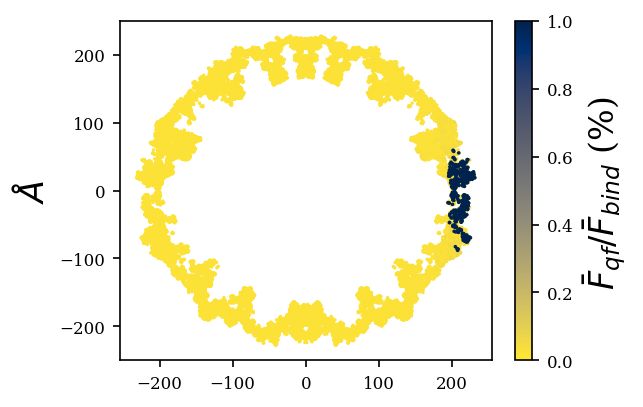

In [4]:
# Force qf plot for plane x-y (z=0) for capsid
# Select plane for the plot
plane = 0#-145.25
near_plane = numpy.where(abs(position[:,2]-plane)<0.5)[0] # Atoms between +-0.5 A
near_plane2 = numpy.where(abs(position[:,2]-plane)<2.5)[0] # Atoms between +-2.5 A

# Plotting
x = position[near_plane,0]
y = position[near_plane,1]
x2 = position[near_plane2,0]
y2 = position[near_plane2,1]
f_porcent = 100*(fqf_mag_386[near_plane])/(f_tot_mag_386) #Force percentage
f_porcent2 = 100*(fqf_mag_386[near_plane2])/(f_tot_mag_386) #Force percentage
f_greater  = numpy.where(f_porcent2 > 1)[0] #Detect forces greater than 1% of the total force
fqf_plane = fqf_386[near_plane2]
fqf_plane_greater = fqf_plane[f_greater]

plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.scatter(x2,y2,c=f_porcent2,s=0.5, cmap='cividis_r',vmin=-0.3)
plt.scatter(x2[f_greater],y2[f_greater],c=f_porcent2[f_greater],cmap='cividis_r',s=0.5,vmin=0,vmax=1)
plt.colorbar(label=r'$\bar{F}_{qf} /  \bar{F}_{bind} $ (%) ')
plt.ylabel('$\AA$')
plt.savefig('plots_capsid\\fqf_3a_z={0}_{1}_{2}mM.pdf'.format(plane,sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
print('Plane z =', plane)
print('Atoms with force greater than 1% of the total force: ', len(f_greater))
print('Atoms displaced by more than +-0.5 Angstrom: ', len(near_plane))
print('Atoms displaced by more than +-2.5 Angstrom: ', len(near_plane2))
print('Total force for atoms greater than 1% of the total force: ', numpy.sum(fqf_plane_greater,axis=0))
print('Total force in slice: ', numpy.sum(fqf_plane,axis=0))

### Figure 3b)

Plane x = 210
Atoms between +-2.5 Angstrom: 7313


<Figure size 432x288 with 0 Axes>

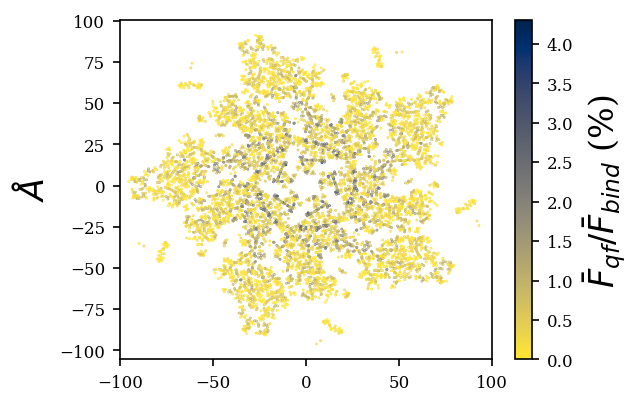

In [5]:
# Force qf plot for plane y-z (x=210) for capsid
# Select plane for the plot
plane = 210#-145.25
near_plane = numpy.where(abs(position[:,0]-plane)<2.5)[0]

# Plotting
y = position[near_plane,1]
z = position[near_plane,2]
f_porcent = 100*(fqf_mag_386[near_plane])/(f_tot_mag_386)
plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.scatter(y,z,c=f_porcent,cmap='cividis_r',vmin=0,marker='.',s=0.5) # ver si quitar el marker
plt.colorbar(label=r'$\bar{F}_{qf} /\bar{F}_{bind} $ (%) ')
plt.xlim([-100,100])
plt.ylabel('$\AA$')
plt.savefig('plots_capsid\\fqf_3b_x={0}ang_{1}_{2}mM.pdf'.format(plane,sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
print('Plane x =', plane)
print('Atoms between +-2.5 Angstrom:', len(near_plane))

### Figure 3c)

Plane x = 210
Atoms displaced by more than +-2.5 Angstrom:  7313
Atoms of GLU greater than 3.6% in slice  0
Total force for atoms of GLU greater than 3.6% of the total force:  [0. 0. 0.]
Atoms of LYS greater than 3.6% in slice  0
Total force for atoms of LYS greater than 3.6% of the total force:  [0. 0. 0.]
Atoms of ASP greater than 3.6% in slice  0
Total force for atoms of ASP greater than 3.6% of the total force:  [0. 0. 0.]
Total force in slice:  [ 2.92345298e+01 -2.26100055e-01 -8.65092295e-03]


<Figure size 432x288 with 0 Axes>

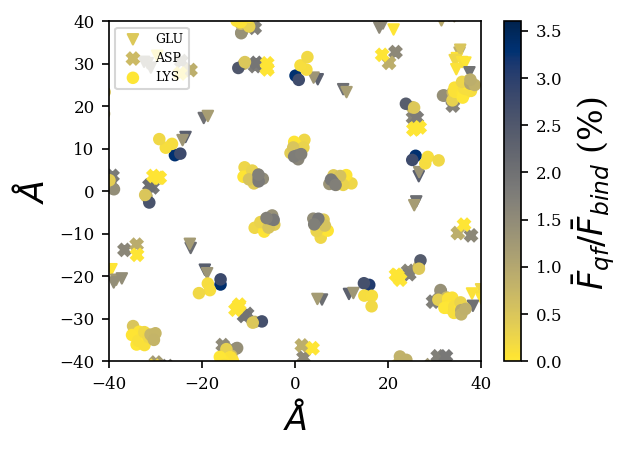

In [6]:
### Figure 3c)
# Plotting for each chain
plane = 210 #-145.25
near_plane_abs = numpy.where(abs(position[:,0]-plane)<2.5)[0] #Plane between +-1 angstrom
near_plane_GLU = numpy.where(amino_acid_name[near_plane_abs] == b'GLU')[0] #Selecting atoms of the chain GLU
near_plane_LYS = numpy.where(amino_acid_name[near_plane_abs] == b'LYS')[0] #Selecting atoms of the chain LYS
near_plane_ASP = numpy.where(amino_acid_name[near_plane_abs] == b'ASP')[0] #Selecting atoms of the chain ASP


# Plotting
y_GLU = position[near_plane_abs[near_plane_GLU],1]
z_GLU = position[near_plane_abs[near_plane_GLU],2]
f_porcent_GLU = 100*(fqf_mag_386[near_plane_abs[near_plane_GLU]])/(f_tot_mag_386)
f_greater_GLU = numpy.where(f_porcent_GLU > 3.6)[0] #Detect forces greater than 3.6% of the total force
fqf_plane_greater_GLU = fqf_386[near_plane_abs[near_plane_GLU[f_greater_GLU]]]

y_LYS = position[near_plane_abs[near_plane_LYS],1]
z_LYS = position[near_plane_abs[near_plane_LYS],2]
f_porcent_LYS = 100*(fqf_mag_386[near_plane_abs[near_plane_LYS]])/(f_tot_mag_386)
f_greater_LYS = numpy.where(f_porcent_LYS > 3.6)[0] #Detect forces greater than 3.6% of the total force
fqf_plane_greater_LYS = fqf_386[near_plane_abs[near_plane_LYS[f_greater_LYS]]]

y_ASP = position[near_plane_abs[near_plane_ASP],1]
z_ASP = position[near_plane_abs[near_plane_ASP],2]
f_porcent_ASP = 100*(fqf_mag_386[near_plane_abs[near_plane_ASP]])/(f_tot_mag_386)
f_greater_ASP = numpy.where(f_porcent_ASP > 3.6)[0] #Detect forces greater than 3.6% of the total force
fqf_plane_greater_ASP = fqf_386[near_plane_abs[near_plane_ASP[f_greater_ASP]]]

plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.scatter(y_GLU,z_GLU,c=f_porcent_GLU,s=25,cmap='cividis_r',marker='v',vmin=0,vmax=3.6,label='GLU')
plt.scatter(y_ASP,z_ASP,c=f_porcent_ASP,s=25,cmap='cividis_r',marker='x',vmin=0,vmax=3.6,label='ASP')
plt.scatter(y_LYS,z_LYS,c=f_porcent_LYS,s=25,cmap='cividis_r',marker='o',vmin=0,vmax=3.6,label='LYS')
plt.xlim([-40,40]); plt.ylim([-40,40])
plt.legend(loc='upper left',prop={'size': 6})
plt.ylabel('$\AA$')
plt.xlabel('$\AA$')
plt.colorbar(label=r'$\bar{F}_{qf} / \bar{F}_{bind}  $ (%) ')
plt.savefig('plots_capsid\\fqf_3c_x={0}ang_{1}_{2}_{3}mM.pdf'.format(plane,'GLULYSASP',sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')

print('Plane x =', plane)
print('Atoms displaced by more than +-2.5 Angstrom: ', len(near_plane_abs))
print('Atoms of GLU greater than 3.6% in slice ', len(fqf_plane_greater_GLU))
print('Total force for atoms of GLU greater than 3.6% of the total force: ', numpy.sum(fqf_plane_greater_GLU,axis=0))
print('Atoms of LYS greater than 3.6% in slice ', len(fqf_plane_greater_LYS))
print('Total force for atoms of LYS greater than 3.6% of the total force: ', numpy.sum(fqf_plane_greater_LYS,axis=0))
print('Atoms of ASP greater than 3.6% in slice ', len(fqf_plane_greater_ASP))
print('Total force for atoms of ASP greater than 3.6% of the total force: ', numpy.sum(fqf_plane_greater_ASP,axis=0))
print('Total force in slice: ', numpy.sum(fqf_386[near_plane_abs] ,axis=0))

### Figure 4a)

Max force in chain GLU: 112.43, slice location 230
Max force in chain ASP: 92.07, slice location 205
Max force in chain LYS: 87.89, slice location 220
Max force in chain THR: 83.81, slice location 225
Max force in chain ARG: 51.41, slice location 200
Max force in chain VAL: 32.77, slice location 200
Max force in chain ILE: 27.21, slice location 210
Max force in chain PRO: 20.88, slice location 215
Max force in chain TYR: 18.95, slice location 225
Max force in chain LEU: 18.40, slice location 205
Max force in chain ASN: 17.35, slice location 215
Max force in chain GLN: 16.27, slice location 200
Max force in chain SER: 12.47, slice location 225
Max force in chain ALA: 11.79, slice location 225
Max force in chain GLY: 11.03, slice location 195
Max force in chain HIE: 10.94, slice location 210
Max force in chain PHE: 10.21, slice location 195
Max force in chain MET: 8.87, slice location 200
Max force in chain CYX: 7.70, slice location 200
Max force in chain TRP: 6.01, slice location 200
Ma

<Figure size 432x288 with 0 Axes>

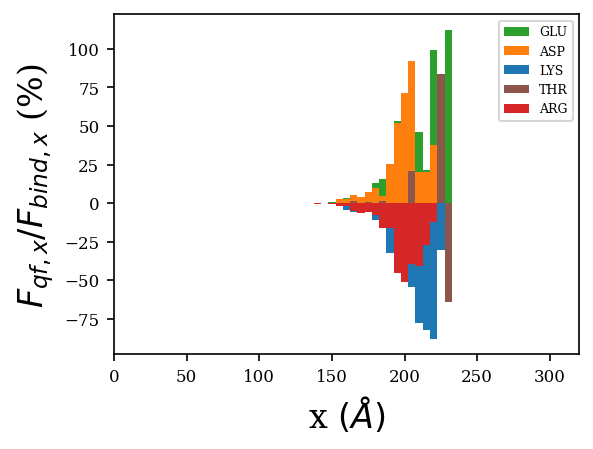

In [7]:
# identify amino acids names or chains
h= 5
planes, f_porcent_chain,f_porcent_chain_mag = zp.get_f_porcent_planes(0,235,h,fqf_386,types,position,amino_acid_name,f_tot_xaxis_386)

# Verification of the most important amino acids by force magnitude
f_porcent_chain_mag_sorted = sorted(f_porcent_chain_mag.items(), key=lambda x: max(abs(x[1])), reverse=True)   
planes_fmax = []
aminoacid_fmax = []
for chain, forces in f_porcent_chain_mag_sorted:
    print('Max force in chain %s: %.2f, slice location %.1d' %(chain,max(abs(forces)),planes[numpy.argmax(abs(forces))]))
    planes_fmax.append(planes[numpy.argmax(abs(forces))])
    aminoacid_fmax.append(chain)

plt.clf()
plt.figure(figsize=(4,3),dpi=150)
# Minus sign in forces to follow the convention of the paper
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[0]],width=h,label=aminoacid_fmax[0],color=zp.color_aminoacid(aminoacid_fmax[0])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[1]],width=h,label=aminoacid_fmax[1],color=zp.color_aminoacid(aminoacid_fmax[1])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[2]],width=h,label=aminoacid_fmax[2],color=zp.color_aminoacid(aminoacid_fmax[2])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[3]],width=h,label=aminoacid_fmax[3],color=zp.color_aminoacid(aminoacid_fmax[3])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[4]],width=h,label=aminoacid_fmax[4],color=zp.color_aminoacid(aminoacid_fmax[4]))
plt.legend(prop={'size': 6})
plt.xlabel('x $(\AA)$'); plt.ylabel(r'$F_{qf,x}/F_{bind,x}$ (%) ')
plt.xlim([0,320]); plt.xticks(numpy.arange(0,350,50))
plt.savefig('plots_capsid\\fqf_4a_forcesbar_h={0}_{1}_{2}mM.pdf'.format(str(h),sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
plt.show()


### Figure 4b)

<Figure size 432x288 with 0 Axes>

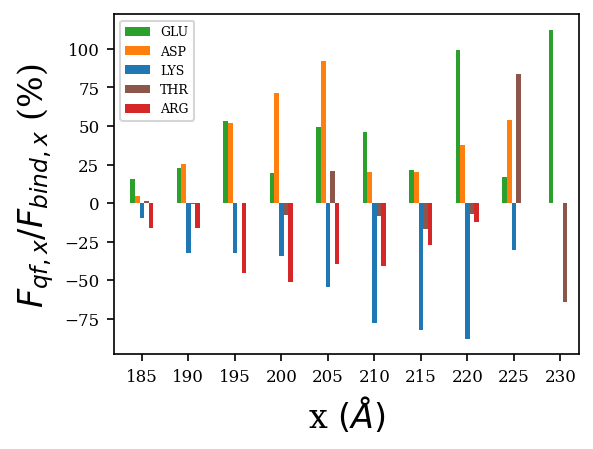

In [8]:
plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.bar(planes-2*h/10, f_porcent_chain_mag[aminoacid_fmax[0]],width=h/10,label=aminoacid_fmax[0],color=zp.color_aminoacid(aminoacid_fmax[0])) 
plt.bar(planes-h/10, f_porcent_chain_mag[aminoacid_fmax[1]],width=h/10,label=aminoacid_fmax[1],color=zp.color_aminoacid(aminoacid_fmax[1])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[2]],width=h/10,label=aminoacid_fmax[2],color=zp.color_aminoacid(aminoacid_fmax[2]))
plt.bar(planes+h/10, f_porcent_chain_mag[aminoacid_fmax[3]],width=h/10,label=aminoacid_fmax[3],color=zp.color_aminoacid(aminoacid_fmax[3])) 
plt.bar(planes+2*h/10, f_porcent_chain_mag[aminoacid_fmax[4]],width=h/10,label=aminoacid_fmax[4],color=zp.color_aminoacid(aminoacid_fmax[4]))
plt.legend(prop={'size': 6})
plt.xlabel('x $(\AA)$')
plt.ylabel(r'$F_{qf,x}/F_{bind,x}$ (%) ')
plt.xticks(numpy.linspace(185,240,(240-185)//h +1))
plt.xlim([182,232])
plt.savefig('plots_capsid\\fqf_4b_forcesbar_h={0}_{1}_{2}mM.pdf'.format(h,sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
plt.show()

### Figure 4c)

In [9]:
#count amino_acid_name in the file
n_aminoacid = dict()
for aminoacid in types:
    aminoacid_name = aminoacid.decode('utf-8')
    n_aminoacid[aminoacid_name] = len(numpy.where(aminoacid == amino_acid_name)[0])

# sort by number of atoms in n_aminoacid
n_aminoacid_sorted = sorted(n_aminoacid.items(), key=lambda x: x[1], reverse=True)   
print('Total number of atoms:', len(atom_name))
print('Total number of amino acids atoms:', sum(n_aminoacid.values()))
n_aminoacid_sorted

Total number of atoms: 1576628
Total number of amino acids atoms: 1576628


[('LEU', 188100),
 ('LYS', 126632),
 ('VAL', 118080),
 ('THR', 115920),
 ('ARG', 99360),
 ('ILE', 96120),
 ('SER', 87300),
 ('ALA', 85140),
 ('GLU', 78180),
 ('GLY', 71820),
 ('PHE', 68400),
 ('MET', 58140),
 ('HIE', 58140),
 ('TRP', 56160),
 ('ASP', 53952),
 ('TYR', 49140),
 ('GLN', 48960),
 ('PRO', 47880),
 ('ASN', 45360),
 ('CYX', 21600),
 ('CYS', 1980),
 ('GLH', 128),
 ('LYN', 84),
 ('ASH', 52)]

<Figure size 432x288 with 0 Axes>

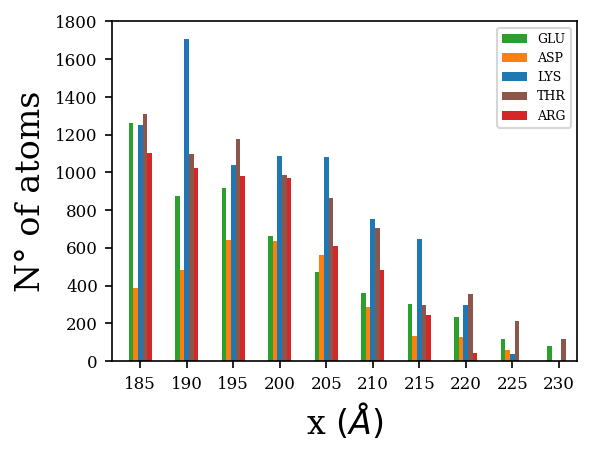

In [10]:
h= 5
planes, n_atoms = zp.get_atoms_aminoacid_planes(0,235,h,types,position,amino_acid_name)

plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.bar(planes-2*h/10, n_atoms[aminoacid_fmax[0]],width=h/10,label=aminoacid_fmax[0],color=zp.color_aminoacid(aminoacid_fmax[0])) 
plt.bar(planes-h/10, n_atoms[aminoacid_fmax[1]],width=h/10,label=aminoacid_fmax[1],color=zp.color_aminoacid(aminoacid_fmax[1])) 
plt.bar(planes, n_atoms[aminoacid_fmax[2]],width=h/10,label=aminoacid_fmax[2],color=zp.color_aminoacid(aminoacid_fmax[2])) 
plt.bar(planes+h/10, n_atoms[aminoacid_fmax[3]],width=h/10,label=aminoacid_fmax[3],color=zp.color_aminoacid(aminoacid_fmax[3])) 
plt.bar(planes+2*h/10, n_atoms[aminoacid_fmax[4]],width=h/10,label=aminoacid_fmax[4],color=zp.color_aminoacid(aminoacid_fmax[4]))
plt.legend(prop={'size': 6})
plt.xlabel('x $(\AA)$')
plt.ylabel(r'N° of atoms')
plt.xticks(numpy.linspace(185,240,(240-185)//h +1))
plt.xlim([182,232])
plt.ylim([0,1800])
plt.savefig('plots_capsid\\fqf_4c_atomsbar_h={0}_{1}_{2}mM.pdf'.format(h,sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
plt.show()

### Figure SI (Force per atom unit in slices)

C:\Users\ianad\AppData\Local\Temp/ipykernel_16508/2642709507.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(planes-h/10, f_porcent_chain_mag[aminoacid_fmax[1]]/n_atoms[aminoacid_fmax[1]],width=h/10,label=aminoacid_fmax[1],color=zp.color_aminoacid(aminoacid_fmax[1]))
C:\Users\ianad\AppData\Local\Temp/ipykernel_16508/2642709507.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[2]]/n_atoms[aminoacid_fmax[2]],width=h/10,label=aminoacid_fmax[2],color=zp.color_aminoacid(aminoacid_fmax[2]))
C:\Users\ianad\AppData\Local\Temp/ipykernel_16508/2642709507.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(planes+2*h/10, f_porcent_chain_mag[aminoacid_fmax[4]]/n_atoms[aminoacid_fmax[4]],width=h/10,label=aminoacid_fmax[4],color=zp.color_aminoacid(aminoacid_fmax[4]))


<Figure size 432x288 with 0 Axes>

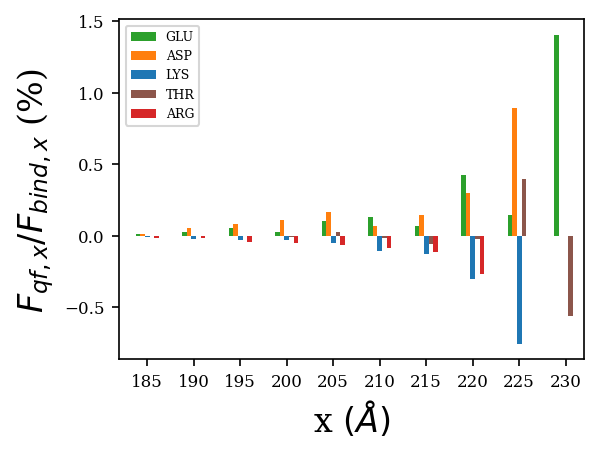

In [11]:
plt.clf()
plt.figure(figsize=(4,3),dpi=150)
plt.bar(planes-2*h/10, (f_porcent_chain_mag[aminoacid_fmax[0]] / n_atoms[aminoacid_fmax[0]]) ,width=h/10,label=aminoacid_fmax[0],color=zp.color_aminoacid(aminoacid_fmax[0])) 
plt.bar(planes-h/10, f_porcent_chain_mag[aminoacid_fmax[1]]/n_atoms[aminoacid_fmax[1]],width=h/10,label=aminoacid_fmax[1],color=zp.color_aminoacid(aminoacid_fmax[1])) 
plt.bar(planes, f_porcent_chain_mag[aminoacid_fmax[2]]/n_atoms[aminoacid_fmax[2]],width=h/10,label=aminoacid_fmax[2],color=zp.color_aminoacid(aminoacid_fmax[2]))
plt.bar(planes+h/10, f_porcent_chain_mag[aminoacid_fmax[3]]/n_atoms[aminoacid_fmax[3]],width=h/10,label=aminoacid_fmax[3],color=zp.color_aminoacid(aminoacid_fmax[3])) 
plt.bar(planes+2*h/10, f_porcent_chain_mag[aminoacid_fmax[4]]/n_atoms[aminoacid_fmax[4]],width=h/10,label=aminoacid_fmax[4],color=zp.color_aminoacid(aminoacid_fmax[4]))
plt.legend(prop={'size': 6})
plt.xlabel('x $(\AA)$')
plt.ylabel(r'$F_{qf,x}/F_{bind,x}$ (%) ')
plt.xticks(numpy.linspace(185,240,(240-185)//h +1))
plt.xlim([182,232])
plt.savefig('plots_capsid\\fqf_4c_forceatomsbar_h={0}_{1}_{2}mM.pdf'.format(h,sym_active,molar), format='pdf',dpi=150,bbox_inches='tight')
plt.show()

### Net charge calculation in slices

In [12]:
#Max net charge and slice ubication
planes, qnet_chain = zp.get_qnet_planes(-285,285,h,q,types,position,amino_acid_name)
qnet_chain_sorted = sorted(qnet_chain.items(), key=lambda x: max(x[1]), reverse=True)   
for chain, charge in qnet_chain_sorted:
    print('Max charge in chain %s: %.2f, slice location %.1d' %(chain,max(charge),planes[numpy.argmax(charge)]))

Max charge in chain LYS: 102.24, slice location 0
Max charge in chain ARG: 86.84, slice location -65
Max charge in chain VAL: 20.79, slice location -200
Max charge in chain LEU: 20.46, slice location 100
Max charge in chain GLY: 19.43, slice location 160
Max charge in chain THR: 18.08, slice location -10
Max charge in chain ILE: 17.49, slice location -100
Max charge in chain ASN: 15.41, slice location -165
Max charge in chain ALA: 15.31, slice location -65
Max charge in chain TRP: 15.07, slice location 0
Max charge in chain GLN: 15.05, slice location -85
Max charge in chain PHE: 13.52, slice location -145
Max charge in chain SER: 12.83, slice location -175
Max charge in chain MET: 12.51, slice location -90
Max charge in chain TYR: 12.31, slice location -120
Max charge in chain HIE: 12.01, slice location -185
Max charge in chain CYX: 7.94, slice location 90
Max charge in chain PRO: 7.88, slice location 10
Max charge in chain CYS: 2.83, slice location -135
Max charge in chain ASH: 0.72, 

In [13]:
#Net charge per slices in max force location order
for j in range(len(planes_fmax)):
    index = numpy.where(planes == planes_fmax[j])[0][0]
    print('Max charge in chain %s: %.2f, slice location %.1d' %(aminoacid_fmax[j],qnet_chain[aminoacid_fmax[j]][index],planes[index]))

Max charge in chain GLU: -8.93, slice location 230
Max charge in chain ASP: -47.62, slice location 205
Max charge in chain LYS: 19.80, slice location 220
Max charge in chain THR: -5.90, slice location 225
Max charge in chain ARG: 43.55, slice location 200
Max charge in chain VAL: 20.79, slice location 200
Max charge in chain ILE: 8.73, slice location 210
Max charge in chain PRO: -2.62, slice location 215
Max charge in chain TYR: -2.46, slice location 225
Max charge in chain LEU: 5.65, slice location 205
Max charge in chain ASN: -2.42, slice location 215
Max charge in chain GLN: 6.34, slice location 200
Max charge in chain SER: 1.13, slice location 225
Max charge in chain ALA: -1.37, slice location 225
Max charge in chain GLY: -13.36, slice location 195
Max charge in chain HIE: -1.26, slice location 210
Max charge in chain PHE: 7.56, slice location 195
Max charge in chain MET: -0.69, slice location 200
Max charge in chain CYX: 5.61, slice location 200
Max charge in chain TRP: -5.97, sli